In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert string representation of list to actual list

In [ ]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg']) # Drop rows where salary_year_avg is NaN

df_da_us = df_da_us.explode('job_skills')

df_da_us[['job_skills', 'salary_year_avg']]


,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0
...,...,...
784882,sql,87500.0
784882,vba,87500.0
784882,tableau,87500.0
784882,excel,87500.0


In [18]:
df_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_top_pay = df_us_group.sort_values(by='median', ascending=False).head(10)
df_da_skill_counts = df_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

df_da_skill_counts

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


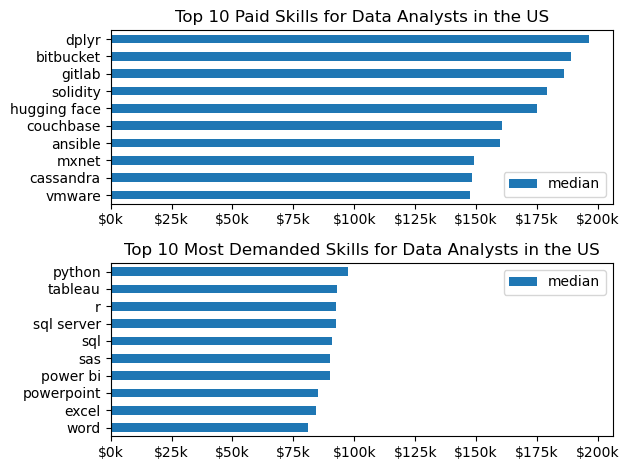

In [32]:
fig, ax = plt.subplots(2, 1)

df_da_top_pay.plot(kind='barh', y='median', ax=ax[0])
ax[0].set_title('Top 10 Paid Skills for Data Analysts in the US')
ax[0].invert_yaxis()  # Invert y-axis to have the highest median salary on top
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}k'))  # Format x-axis labels as currency

df_da_skill_counts[::-1].plot(kind='barh', y='median', ax=ax[1])  # [::-1] is used to reverse the order of the DataFrame so that the skill with the highest count appears at the top of the bar chart.
ax[1].set_title('Top 10 Most Demanded Skills for Data Analysts in the US')
ax[1].set_xlim(ax[0].get_xlim())  # Set the x-axis limits of the second plot to match the first plot for better comparison
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}k'))  # Format x-axis labels as currency

fig.tight_layout() # Adjust layout to prevent overlap
plt.show()
